In [1]:
%matplotlib inline
import os
import json
from glob import glob
from collections import defaultdict, Counter

import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
import seaborn as sbn
import pandas as pd
pd.set_option('display.max_columns', 500)

In [2]:
output_dir =  os.path.join('..', 'output')
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [4]:
# load data
df = pd.read_csv('../data/human_eval/num_items_vs_effect_size.csv', header=0, index_col=0)
print(df.shape)
df.head(n=5)

(117, 15)


,Link,Eval number,Dataset,Metric,Examples,Ann.Per.Ex,Tot.Ann,id,baseline,new,diff,diffPos,diffrank,Metric.category,BigCategory
1,https://www.aclweb.org/anthology/D19-1190.pdf,1,a,Style intensity,500.0,5.0,5.0,35,0.960,0.260,-0.700,False,1,style,style
2,https://www.aclweb.org/anthology/D19-1190.pdf,1,b,Style intensity,500.0,5.0,5.0,37,0.690,0.280,-0.410,False,2,style,style
3,https://www.aclweb.org/anthology/D19-1366.pdf,1,a,Fluency,20.0,NaN,8.0,102,0.648,0.508,-0.140,False,3,fluency,style
4,https://www.aclweb.org/anthology/D19-1366.pdf,1,a,Sentiment compatibility,20.0,NaN,8.0,103,0.518,0.434,-0.084,False,4,sentiment,content
5,https://www.aclweb.org/anthology/D19-1323.pdf,1,nyt,Grammaticality,30.0,3.0,3.0,90,0.694,0.622,-0.072,False,5,grammar,style


In [5]:
# drop NaNs
subset = df.dropna(axis='index', subset=['Examples', 'diff'])
print(subset.shape)

(109, 15)


In [6]:
# exclude two large negative outliers
subset = subset[subset['diff'] > -0.4]
print(subset.shape)

(107, 15)


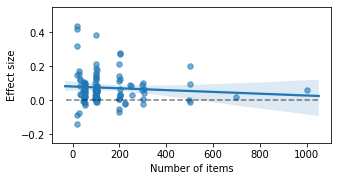

In [7]:
# plot the data
fig, ax = plt.subplots(figsize=(5, 2.5))
sbn.regplot('Examples', 'diff', data=subset, ax=ax, x_jitter=4, y_jitter=0.00, ci=95, scatter_kws={'s':30, 'alpha':0.6})
ax.set_ylim(-0.25, 0.55)
ax.plot([-30, 1050], [0, 0], 'k--', alpha=0.5)
ax.set_xlabel('Number of items')
ax.set_ylabel('Effect size')
plt.savefig(os.path.join(output_dir, 'Figure05.pdf'), bbox_inches='tight')
plt.show();

In [8]:
# run Kendall's correlation test
stats.kendalltau(subset['Examples'].values, subset['diff'].values)

KendalltauResult(correlation=-0.06978286588694131, pvalue=0.3242904626942327)

In [9]:
# Show outliers we have excluded
temp = df[df['diff'] < -0.4]
print(temp)

                                            Link  Eval number Dataset  \
1  https://www.aclweb.org/anthology/D19-1190.pdf            1       a   
2  https://www.aclweb.org/anthology/D19-1190.pdf            1       b   

            Metric  Examples  Ann.Per.Ex  Tot.Ann  id  baseline   new  diff  \
1  Style intensity     500.0         5.0      5.0  35      0.96  0.26 -0.70   
2  Style intensity     500.0         5.0      5.0  37      0.69  0.28 -0.41   

   diffPos  diffrank Metric.category BigCategory  
1    False         1           style       style  
2    False         2           style       style  
